In [1]:
#%pip install vaderSentiment

In [1]:
# Import packages and initialize VADER.
import scienceplots
import matplotlib.pyplot as plt
import pandas as pd
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
analyzer = SentimentIntensityAnalyzer()

plt.style.use(['science', 'ieee', 'grid', 'vibrant', 'no-latex'])


In [2]:
# Concatenate translated texts.

filenames = [i for i in glob.glob('../data/interim/translated/*')]
files = []

for i in range(0, len(filenames)):
    files.append(pd.read_csv(filenames[i]))

# Sort & reset index.
df = pd.concat(files).sort_values(by=['fecha', 'enlace_pdf']).reset_index(drop=True)
df = df[['legislatura', 'fecha', 'objeto_iniciativa',
         'numero_expediente', 'autores', 'nombre_sesion', 'orador', 'enlace_pdf',
         'political_group', 'text', 'text_trad']]

print(len(df))

# Removing 351 rows that were not translated.
df = df.loc[df['text_trad'] != '-1']
df = df.loc[df['text_trad'] != -1]

print(f'After filter: {len(df)}')

df.head(2)


68871
After filter: 68507


,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,text_trad
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","Thank you, Madam President. This investiture h..."
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","Madam President, ladies and gentlemen, Mr. Can..."


In [3]:
df

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,text_trad
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","Thank you, Madam President. This investiture h..."
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","Madam President, ladies and gentlemen, Mr. Can..."
2,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Trías i Vidal de Llobatera, Xavier (GC-CiU)",https://www.congreso.es:443/public_oficiales/L...,CIU,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, it is a..."
3,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Martínez Noval, Luis (GS)",https://www.congreso.es:443/public_oficiales/L...,PSOE,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, Mr. Azn..."
4,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Aznar López, José María (GP)",https://www.congreso.es:443/public_oficiales/L...,PP,"Señora presidenta, señorías, en una cosa estoy...","Madam President, ladies and gentlemen, in one ..."
...,...,...,...,...,...,...,...,...,...,...,...
68790,14,2022-12-22,Proyecto de Ley de pesca sostenible e investig...,121/000102/0000,Gobierno,Pleno,"Zambrano García-Raez, Carlos José (GVOX)",https://www.congreso.es:443/public_oficiales/L...,VOX,"Con la venia, señor presidente. Quiero empezar...","With the permission, Mr. President. I want to ..."
68791,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Agirretxea Urresti, Joseba Andoni (GV (EAJ-PNV))",https://www.congreso.es:443/public_oficiales/L...,PNV,"Señor presidente, intervengo desde el escaño, ...","Mr President, I am speaking from the seat, if ..."
68792,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Álvarez i García, Gerard (GR)",https://www.congreso.es:443/public_oficiales/L...,ERC,"Gràcies, president. Buenas tardes, señorías. H...","Thank you, president. Good afternoon, ladies. ..."
68793,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Jover Díaz, Antonia (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Bon dia, president. Señorías, seré breve, porq...","Good morning, president. Ladies and gentlemen,..."


In [4]:
#df7 = df.loc[df['legislatura'] != 12].reset_index(drop=True)
df['y-m'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.strftime('%Y-%m')
df['y'] = pd.to_datetime(df.fecha, format='%Y-%m-%d').dt.strftime('%Y')

In [9]:
scores = [analyzer.polarity_scores(t) for t in df['text_trad'].tolist()]

In [5]:
import re

# Using regex to count the words in each intv.
lengths = [len(re.findall(r'\w+', t)) for t in df['text_trad'].tolist()]

In [11]:
df['vader_com'] = [item['compound'] for item in scores]
df['vader_neg'] = [item['neg'] for item in scores]
df['vader_neu'] = [item['neu'] for item in scores]
df['vader_pos'] = [item['pos'] for item in scores]

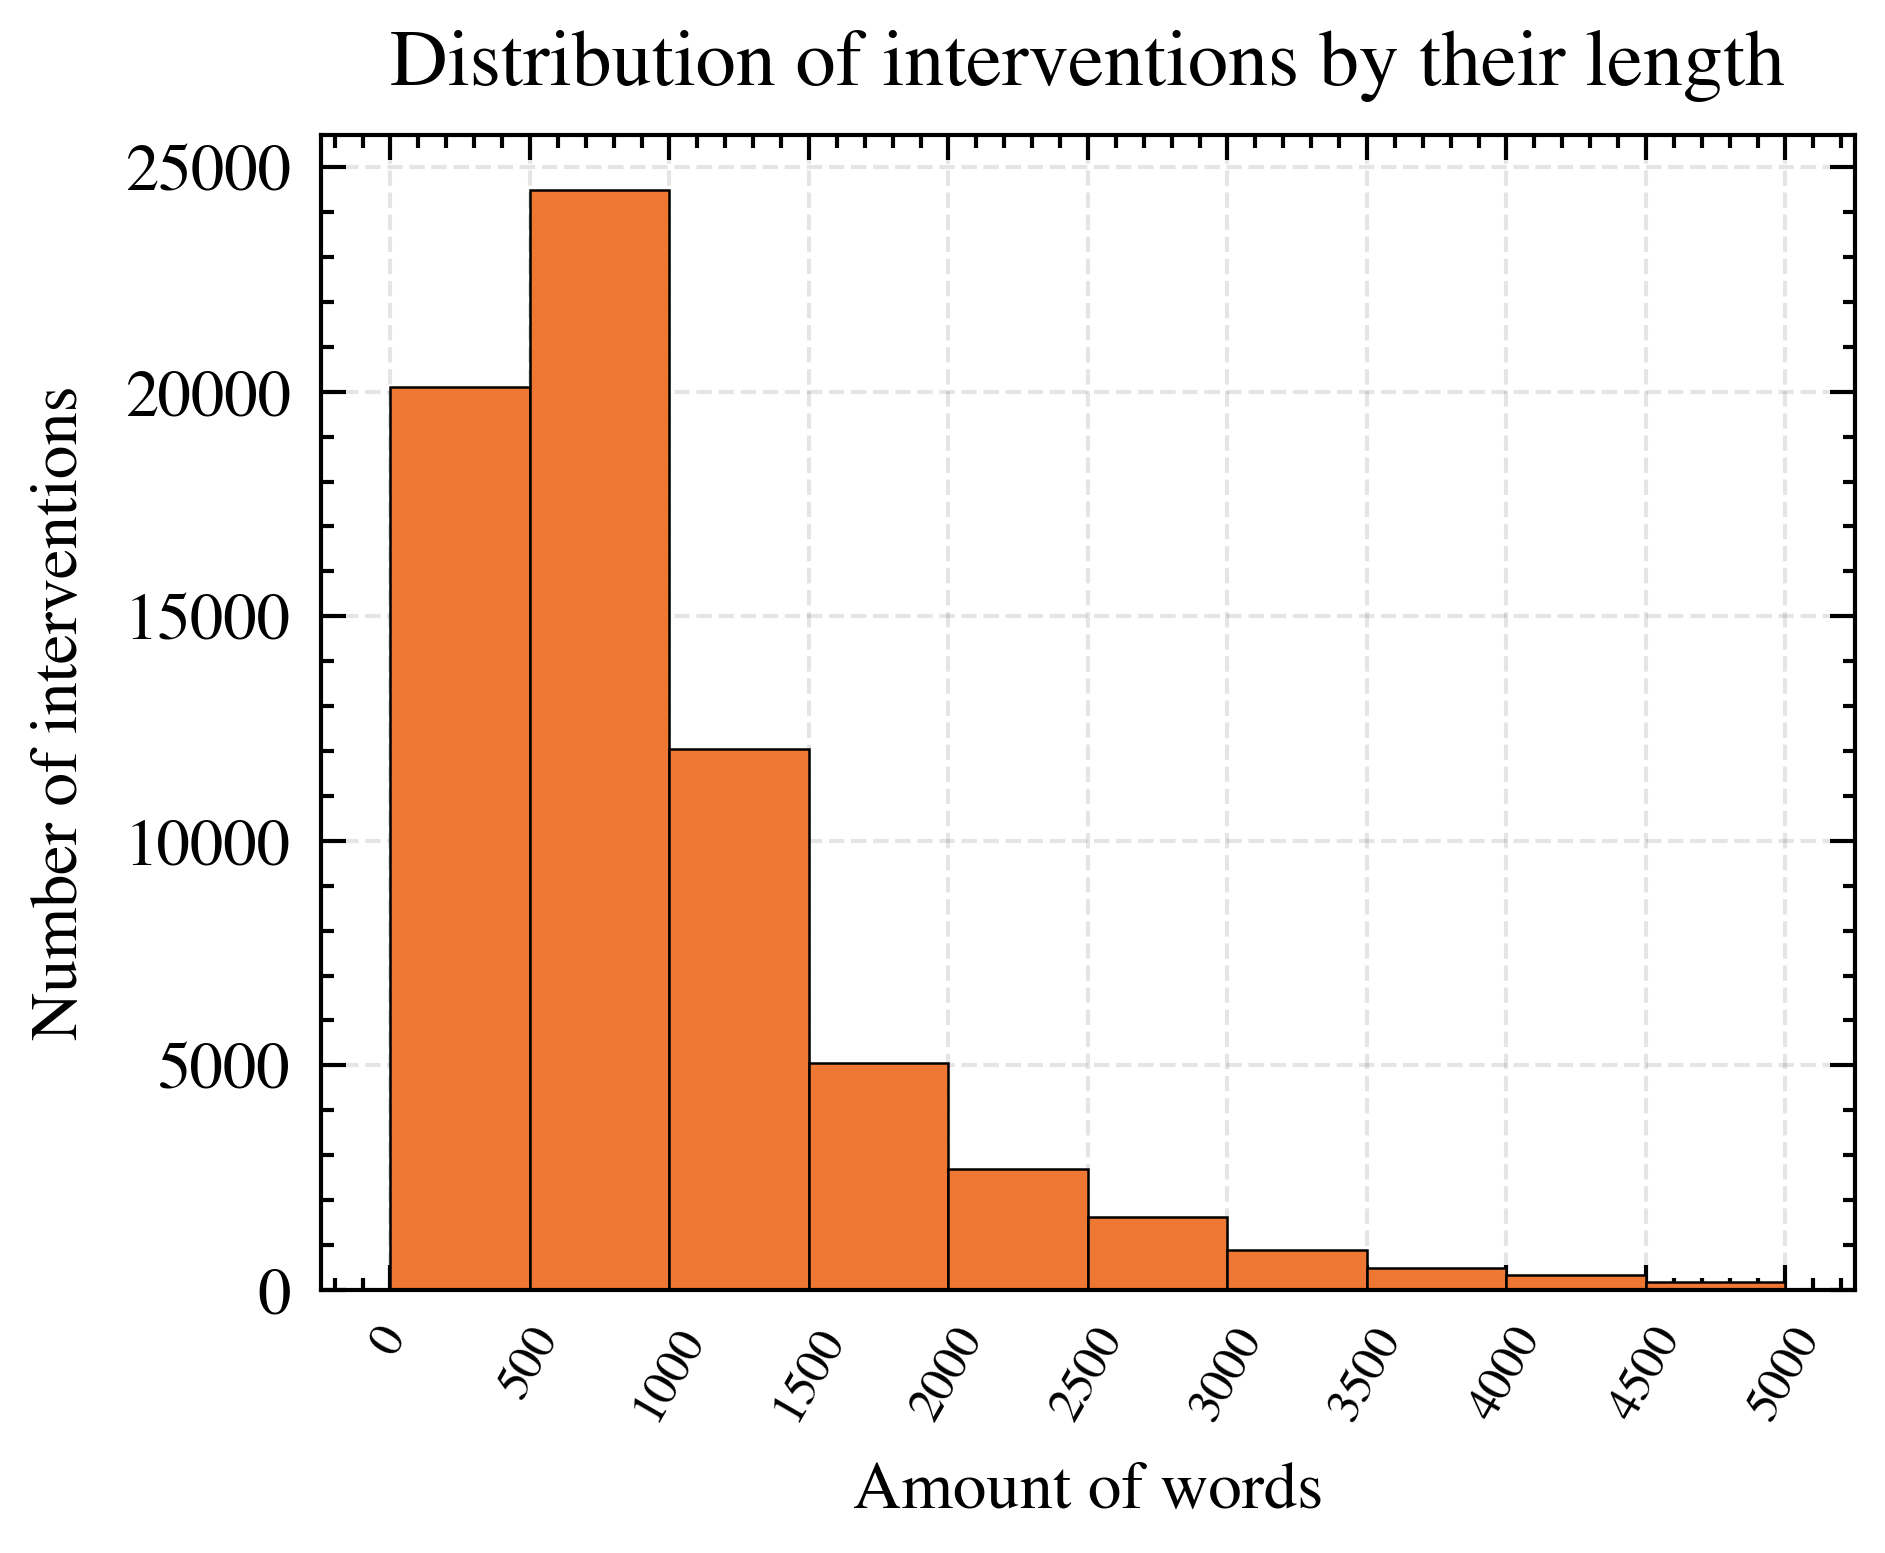

In [36]:
fig, ax = plt.subplots()
bin_ranges = range(0, 5500, 500)

ax.hist(lengths, bins=bin_ranges, edgecolor='black', linewidth=.3)
ax.set_xticks(bin_ranges)
ax.set_xticklabels(bin_ranges, rotation=60, fontsize=6)
ax.set_xlabel('Amount of words')
ax.set_ylabel('Number of interventions')
ax.set_title('Distribution of interventions by their length')
ax.grid(alpha=0.1)


In [12]:
df['lengths'] = lengths

In [13]:
#df.to_csv('../data/final/vader_processed.csv', index=False)

In [7]:
df = pd.read_csv('../data/final/vader_processed.csv')
df

,legislatura,fecha,objeto_iniciativa,numero_expediente,autores,nombre_sesion,orador,enlace_pdf,political_group,text,text_trad,y-m,y,vader_com,vader_neg,vader_neu,vader_pos,lengths
0,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Anasagasti Olabeaga, Iñaki Mirena (GV-PNV)",https://www.congreso.es:443/public_oficiales/L...,PNV,"Gracias, señora presidenta. Esta investidura n...","Thank you, Madam President. This investiture h...",2000-04,2000,0.9824,0.117,0.758,0.126,6436
1,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Frutos Gras, Francisco (GIU)",https://www.congreso.es:443/public_oficiales/L...,IU,"Señora presidenta, seño- ras y señores diputad...","Madam President, ladies and gentlemen, Mr. Can...",2000-04,2000,1.0000,0.066,0.801,0.133,8207
2,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Trías i Vidal de Llobatera, Xavier (GC-CiU)",https://www.congreso.es:443/public_oficiales/L...,CIU,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, it is a...",2000-04,2000,1.0000,0.026,0.816,0.158,5249
3,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Martínez Noval, Luis (GS)",https://www.congreso.es:443/public_oficiales/L...,PSOE,"Señora presidenta, señoras y señores diputados...","Madam President, ladies and gentlemen, Mr. Azn...",2000-04,2000,0.9999,0.055,0.830,0.115,6825
4,7,2000-04-25,Propuesta de candidato a la Presidencia del Go...,080/000001/0000,"Juan Carlos I, Rey de España",Pleno,"Aznar López, José María (GP)",https://www.congreso.es:443/public_oficiales/L...,PP,"Señora presidenta, señorías, en una cosa estoy...","Madam President, ladies and gentlemen, in one ...",2000-04,2000,0.9989,0.072,0.791,0.137,1690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68502,14,2022-12-22,Proyecto de Ley de pesca sostenible e investig...,121/000102/0000,Gobierno,Pleno,"Zambrano García-Raez, Carlos José (GVOX)",https://www.congreso.es:443/public_oficiales/L...,VOX,"Con la venia, señor presidente. Quiero empezar...","With the permission, Mr. President. I want to ...",2022-12,2022,0.9970,0.056,0.827,0.117,1098
68503,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Agirretxea Urresti, Joseba Andoni (GV (EAJ-PNV))",https://www.congreso.es:443/public_oficiales/L...,PNV,"Señor presidente, intervengo desde el escaño, ...","Mr President, I am speaking from the seat, if ...",2022-12,2022,0.9772,0.000,0.889,0.111,224
68504,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Álvarez i García, Gerard (GR)",https://www.congreso.es:443/public_oficiales/L...,ERC,"Gràcies, president. Buenas tardes, señorías. H...","Thank you, president. Good afternoon, ladies. ...",2022-12,2022,0.9970,0.032,0.814,0.154,537
68505,14,2022-12-22,Proyecto de Ley del Deporte.,121/000082/0000,Gobierno,Pleno,"Jover Díaz, Antonia (GCUP-EC-GC)",https://www.congreso.es:443/public_oficiales/L...,UP,"Bon dia, president. Señorías, seré breve, porq...","Good morning, president. Ladies and gentlemen,...",2022-12,2022,0.9899,0.044,0.857,0.099,717


In [26]:
cnt = df['vader_com'].groupby(df['y']).count()

In [27]:
neg = []
for item in df.vader_com.tolist():
    if item < -0.05:
        neg.append(1)
    else:
        neg.append(0)

df['neg'] = neg

[Text(0, 0, '2000'),
 Text(3, 0, '2003'),
 Text(6, 0, '2006'),
 Text(9, 0, '2009'),
 Text(12, 0, '2012'),
 Text(15, 0, '2015'),
 Text(18, 0, '2018'),
 Text(21, 0, '2021')]

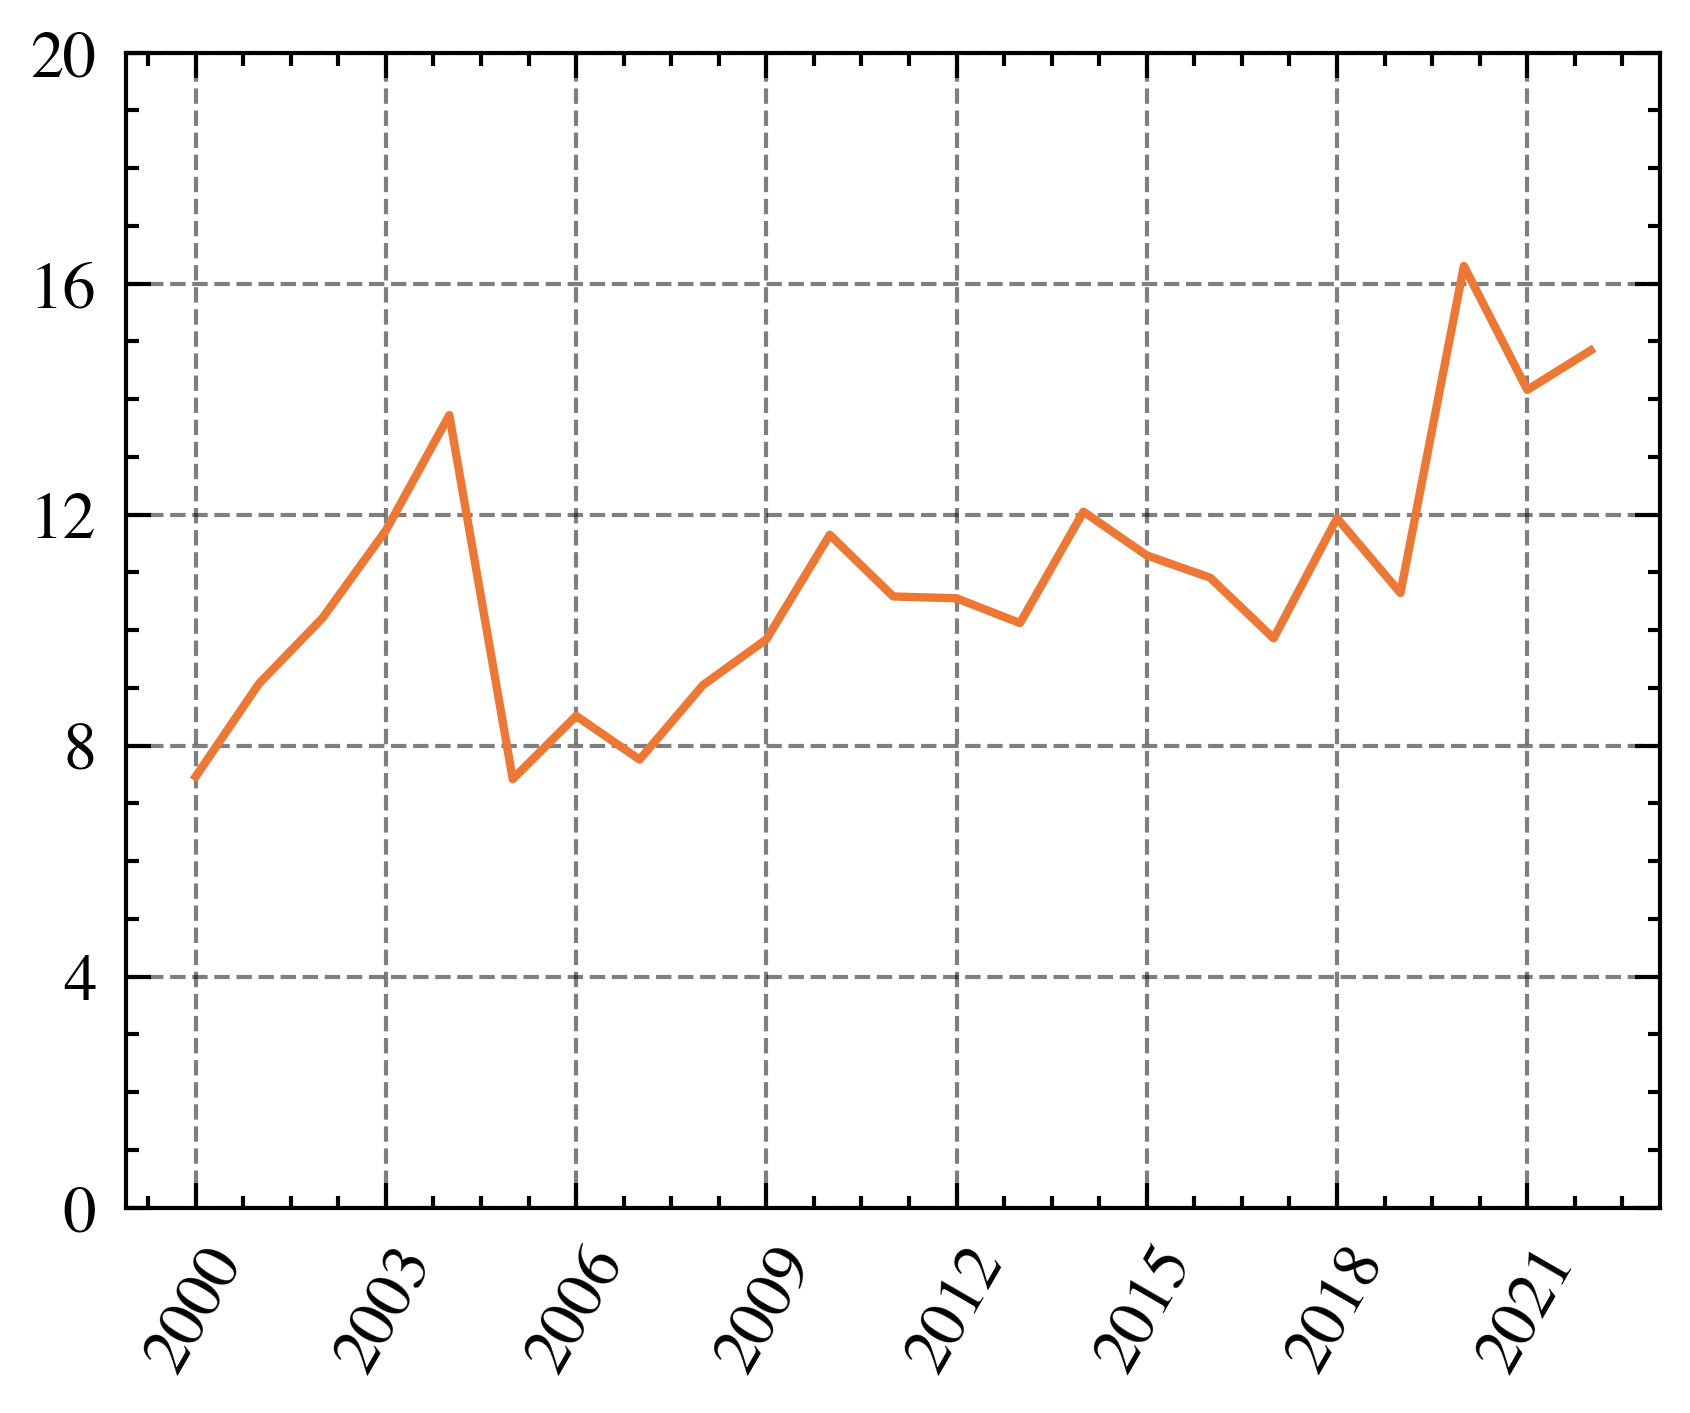

In [30]:
#daily_avg = df7['vader_sent'].groupby(df7['fecha']).sum()/cnt
daily_neg = df['neg'].groupby(df['y']).sum()/cnt * 100

fig, ax = plt.subplots()

x = daily_neg.index.tolist()

ax.plot(daily_neg)
ax.set_yticks(range(0, 21, 4))
ax.set_xticks(range(0, 23, 3))
ax.set_xticklabels(range(2000, 2023, 3), rotation=60)


In [177]:
#df7.loc[(df7['y'] == '2001') & (df7['neg'] == 1)]

#df7.loc[10565].text
#df7.loc[9319].text

#df7.loc[1283].text


Text(0, 0.5, '% of negatively-labelled interventions')

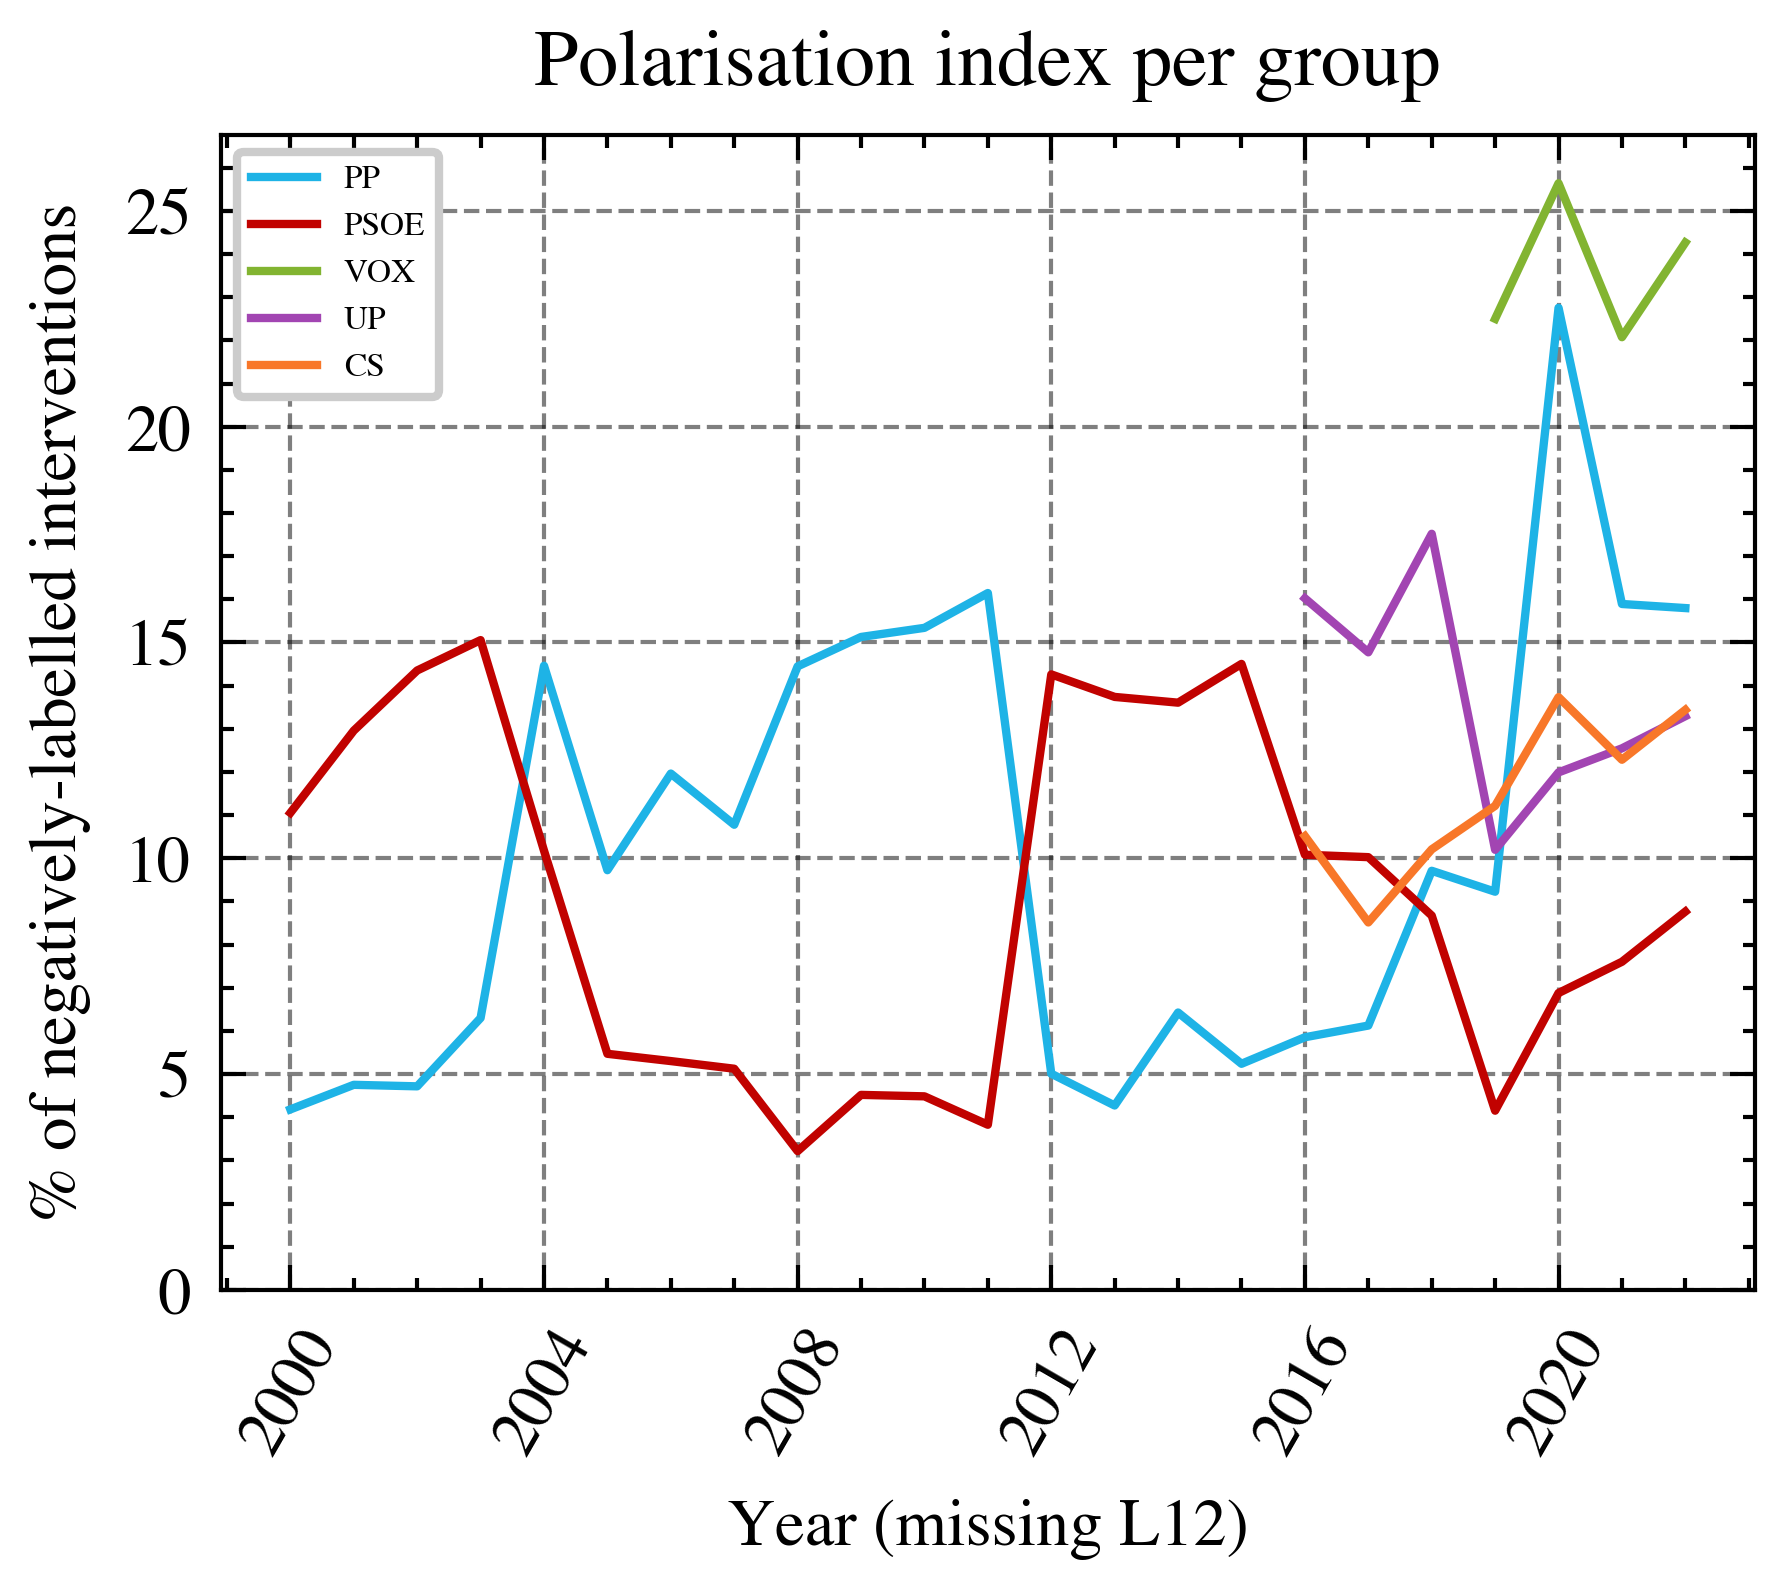

In [34]:
per_group = df.groupby(['political_group', 'y'], as_index=False)[
    'vader_com'].count()
per_group['neg_count'] = df.groupby(['political_group', 'y'], as_index=False)[
    'neg'].sum()['neg']

per_group.columns = ['political_group', 'year', 'count', 'neg_count']

PP = per_group.loc[per_group['political_group'] == 'PP'].set_index('year')
PP = PP['neg_count'] / PP['count'] * 100

PSOE = per_group.loc[per_group['political_group'] == 'PSOE'].set_index('year')
PSOE = PSOE['neg_count'] / PSOE['count'] * 100

VOX = per_group.loc[per_group['political_group'] == 'VOX'].set_index('year')
VOX = VOX['neg_count'] / VOX['count'] * 100

UP = per_group.loc[per_group['political_group'] == 'UP'].set_index('year')
UP = UP['neg_count'] / UP['count'] * 100

CS = per_group.loc[per_group['political_group'] == 'CS'].set_index('year')
CS = CS['neg_count'] / CS['count'] * 100

fig, ax = plt.subplots()

ax.plot(PP, label='PP', c='#1eb3e6')
ax.plot(PSOE, label='PSOE', c='#c10200')
ax.plot(VOX, label='VOX', c='#82b431')
ax.plot(UP, label='UP', c='#a245b2')
ax.plot(CS, label='CS', c='#f87729')

ax.set_yticks(range(0, 30, 5))
ax.set_xticks(range(0, 23, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)
ax.legend(fontsize=4)
ax.set_title('Polarisation index per group')
ax.set_xlabel('Year (missing L12)')
ax.set_ylabel('%' + ' of negatively-labelled interventions')


In [35]:
df.groupby(['political_group', 'y'], as_index=False)['legislatura'].count()


,political_group,y,legislatura
0,CIU,2000,125
1,CIU,2001,309
2,CIU,2002,335
3,CIU,2003,172
4,CIU,2004,177
...,...,...,...
127,UP,2022,1136
128,VOX,2019,40
129,VOX,2020,819
130,VOX,2021,1495


In [36]:
df['vader_neg_length'] = df['vader_neg'] * df['lengths']

pg = df.groupby(['political_group', 'y'], as_index=False)['legislatura'].count()

In [37]:
agg = df.groupby(['political_group', 'y'], as_index=False)['lengths', 'vader_neg_length'].sum()

pg['tvnl'] = agg['vader_neg_length']
pg['tl'] = agg['lengths']

pg['percentage_negativity'] = pg['tvnl'] / pg['tl']

pg = pg[['political_group', 'y', 'tvnl', 'tl',
         'percentage_negativity']]

/var/folders/ct/921g5yd903j7f8wh5k85dltr0000gn/T/ipykernel_5887/3785765229.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg = df.groupby(['political_group', 'y'], as_index=False)['lengths', 'vader_neg_length'].sum()


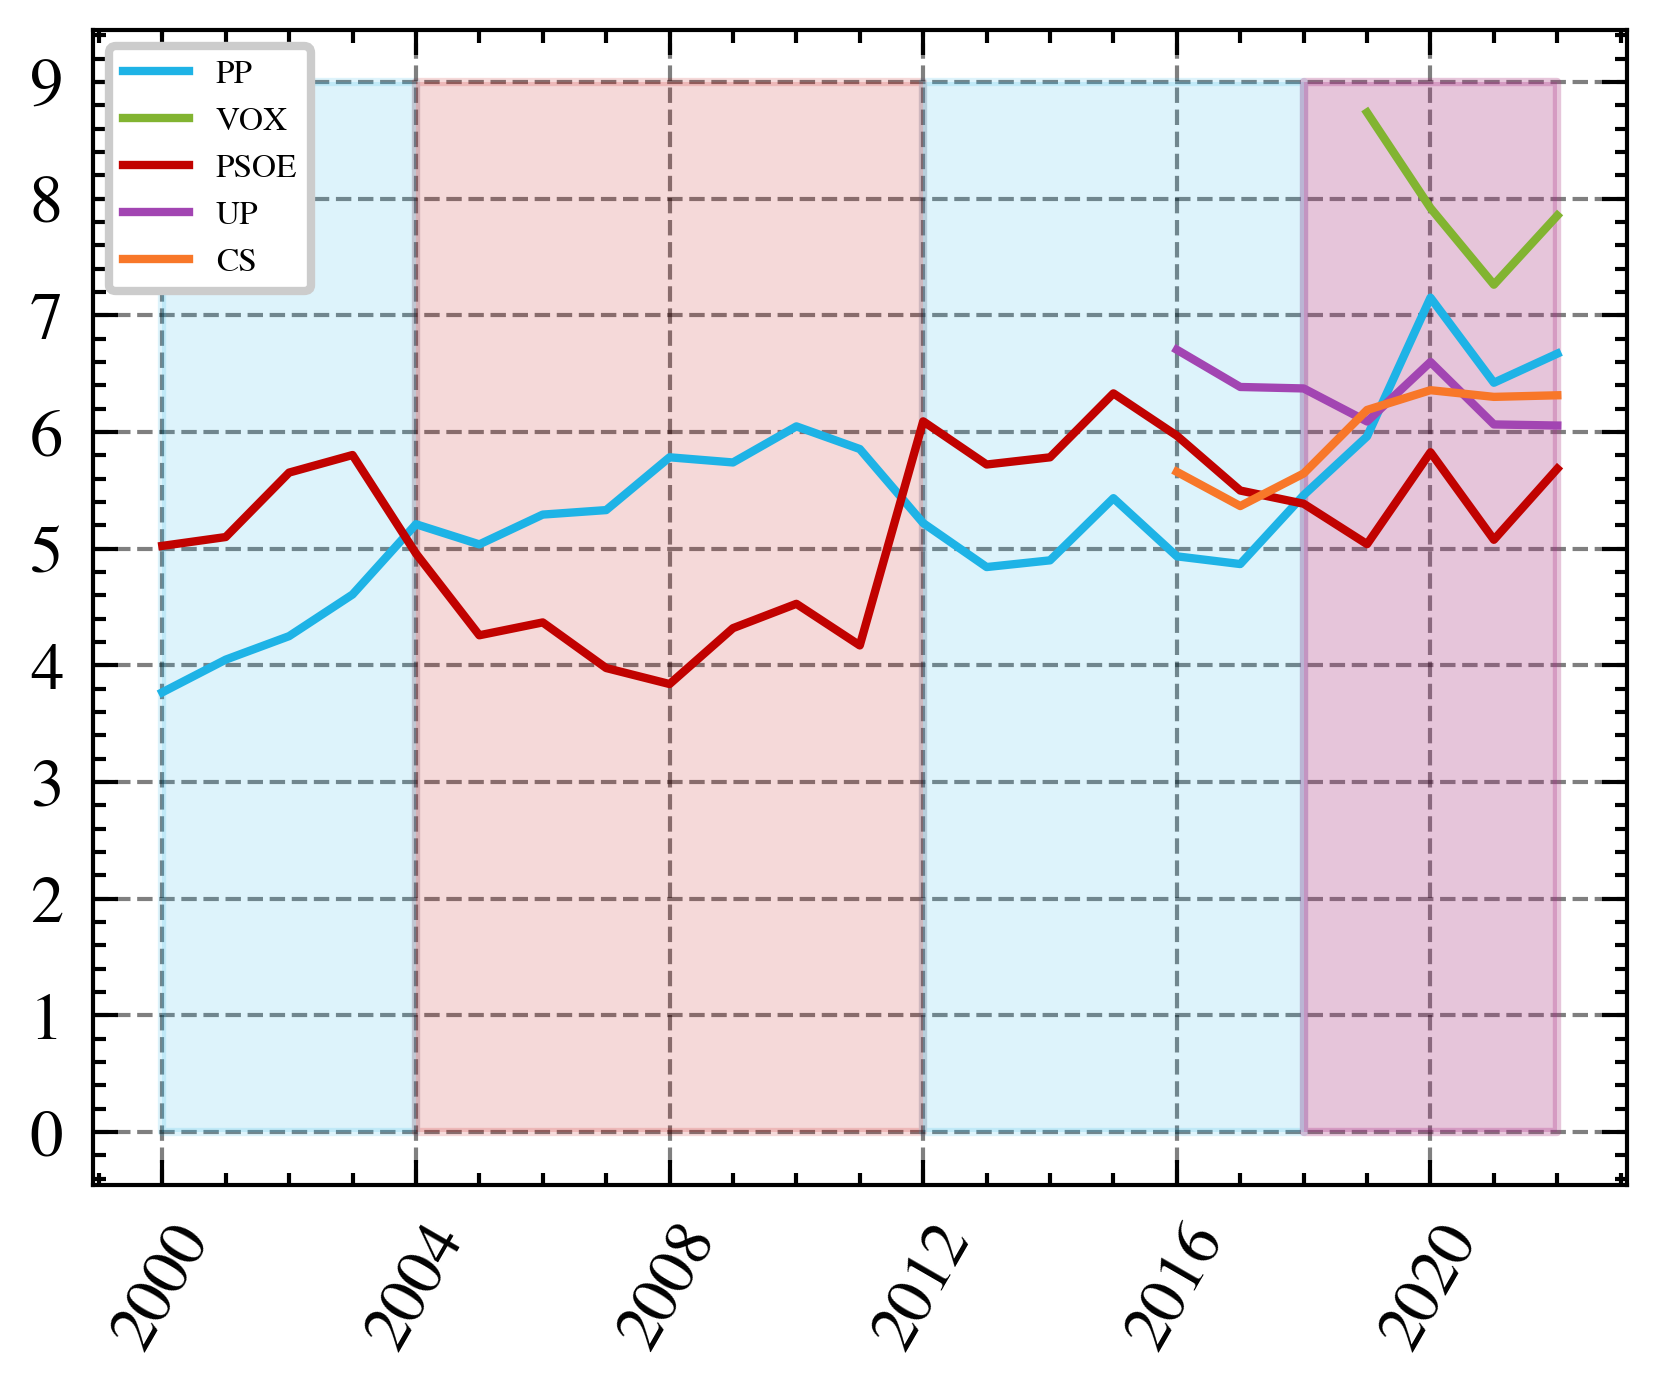

In [38]:
PP = pg.loc[pg['political_group'] == 'PP'].set_index('y')
VOX = pg.loc[pg['political_group'] == 'VOX'].set_index('y')
PSOE = pg.loc[pg['political_group'] == 'PSOE'].set_index('y')
UP = pg.loc[pg['political_group'] == 'UP'].set_index('y')
CS = pg.loc[pg['political_group'] == 'CS'].set_index('y')
#IU = pg.loc[pg['political_group'] == 'IU'].set_index('y')

fig, ax = plt.subplots()

ax.plot(PP['percentage_negativity'] * 100, label='PP', c='#1eb3e6')
ax.plot(VOX['percentage_negativity'] * 100, label='VOX', c='#82b431')
ax.plot(PSOE['percentage_negativity'] * 100, label='PSOE', c='#c10200')
ax.plot(UP['percentage_negativity'] * 100, label='UP', c='#a245b2')
#ax.plot(IU['percentage_negativity'] * 100, label='IU', c='#a245b2')
ax.plot(CS['percentage_negativity'] * 100, label='CS', c='#f87729')

ax.set_yticks(range(0, 10))
ax.set_xticks(range(0, 23, 4))
ax.set_xticklabels(range(2000, 2023, 4), rotation=60)
ax.legend(fontsize=4)

# Fix once I get legislature 12.
ax.fill_between(PP.index[:5], 9, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[4:13], 9, color='#c10200', alpha=.15)
ax.fill_between(PP.index[12:19], 9, color='#1eb3e6', alpha=.15)
ax.fill_between(PP.index[18:], 9, color='#c10200', alpha=.1)
ax.fill_between(PP.index[18:], 9, color='#a245b2', alpha=.2)


### BERT usage

In [39]:
# https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base-sentiment
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)

In [51]:
year = 2003

In [52]:
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

1680

In [ ]:
# Code to count negative labels.
'''
neg_labels = []  # 0 = neutral, 1 = positive, 2 = negative.
for row in sentence_labels:
    if row[0]['label'] == 'positive':
        neg_labels.append(0)
    elif row[0]['label'] == 'negative':
        neg_labels.append(1)
    else:
        neg_labels.append(0)

neg_labels = pd.Series(neg_labels)

# 46% of the sentences in the intervention are negative.
return sum(neg_labels)/len(test)
'''

In [53]:
def roberta_sentiment(row):
    test = row.split('.')

    sentence_labels = []
    for sentence in test:
        try:
            sentence_labels.append(sentiment_task(sentence))
        except:
            sentence_labels.append([{'label': 'error', 'score': np.nan}])
    
    #sentence_labels = [sentiment_task(sentence) for sentence in test]
    #lengths2 = [len(re.findall(r'\w+', sentence)) for sentence in test]

    return sentence_labels

results = [roberta_sentiment(intervention) for intervention in interventions]

In [54]:
with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

In [55]:
assert len(results) == len(interventions), 'Results length & interventions lengths differ!!'

In [56]:
year = 2004
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [57]:
year = 2005
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [58]:
year = 2006
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [59]:
year = 2007
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [60]:
year = 2008
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [61]:
year = 2009
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [63]:
year = 2010
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [64]:
year = 2011
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [65]:
year = 2012
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [66]:
year = 2013
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [67]:
year = 2014
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [68]:
year = 2015
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [69]:
year = 2016
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [70]:
year = 2017
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [71]:
year = 2018
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [72]:
year = 2019
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [73]:
year = 2020
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [74]:
year = 2021
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [75]:
year = 2022
interventions = df.loc[df['y'] == f'{year}'].text_trad.tolist()
len(interventions)

results = [roberta_sentiment(intervention) for intervention in interventions]

with open(f"../data/interim/fixed_sent_y_{year}.txt", "w") as output:
    output.write(str(results))

assert len(results) == len(
    interventions), 'Results length & interventions lengths differ!!'


In [ ]:
# multi = neg_labels * lengths2
# perc = sum(multi) / len(re.findall(r'\w+', df7['text_trad'].loc[0])) * 100
# 60% of the sentences in the intervention of df7.loc[0] considered negative. That's a lot.

59.8508390304537

In [235]:
polarities = [analyzer.polarity_scores(t) for t in test]
polarities = [p['compound'] for p in polarities]
polarities = [1 if p < - 0.05 else 0 for p in polarities]
sum(polarities)/228

0.2982456140350877